In [1]:
#Add matplotlib inline magic command

%matplotlib inline

#import dependencies 

import matplotlib.pyplot as plt

import pandas as pd

import os

# join csv and read


city_data=os.path.join("Resources","city_data.csv")
ride_data=os.path.join("Resources","ride_data.csv")


city_df=pd.read_csv(city_data)
ride_df=pd.read_csv(ride_data)


city_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [2]:
# use count() to find names of columns
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [3]:
# check for any NaN data
city_df.isna().sum()

city            0
driver_count    0
type            0
dtype: int64

In [4]:
#get data types

city_df.dtypes


city            object
driver_count     int64
type            object
dtype: object

In [5]:
# use unique() to return an array or list of the unique values of the column

city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [6]:
# find sum of Surburban and Rural ### using commas will print multiple in a row
sum(city_df["type"]=="Urban"),sum(city_df["type"]=="Rural"),sum(city_df["type"]=="Suburban")


(66, 18, 36)

In [7]:
# Inspect Ride Data DataFrame

# Get the columns and the rows that are not null

ride_df.count()

#find isna()

ride_df.isna().sum()

#get data types of each columns

ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [8]:
## merging the DataFrames

#combine the data into a single data set

pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
                                                   
pyber_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
# creating bubble chart
# 1. get the average fare using mean() for each city
# 2. get total number of rides for each city, using count()
# 3. to get bubble size correlate to nmber of drivers get the average driver_count

## create urban city DataFrame
## this will only give DataFrame that contains only cities with Urban type
urbanC_df=pyber_df[pyber_df["type"]=="Urban"]

urbanC_df.head(5)



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
#create DataFrame for Suburban

suburbanC_df=pyber_df[pyber_df["type"]=="Suburban"]

suburbanC_df.head(5)

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [11]:
#create DataFrame for Rural

ruralC_df=pyber_df[pyber_df["type"]=="Rural"]

ruralC_df.head(10)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
2255,Taylorhaven,2019-04-06 01:01:29,45.31,2275364435623,1,Rural
2256,Garzaport,2019-02-18 18:27:48,36.16,2928337561347,7,Rural
2257,New Ryantown,2019-01-27 17:33:41,42.68,7994603753131,2,Rural
2258,Lake Latoyabury,2019-04-02 21:00:22,13.46,8232864757802,2,Rural
2259,North Holly,2019-02-16 17:02:51,39.46,4571476032148,8,Rural


In [12]:
# get the number of rides for urban cities

urban_ride_count=urbanC_df.groupby(["city"]).count()["ride_id"]

urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [13]:
# get the number of rides for suburban cities

suburban_ride_count=suburbanC_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head(5)

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [14]:
#create the number of rides for rural cities

rural_ride_count=ruralC_df.groupby(["city"]).count()["ride_id"]

rural_ride_count.head(5)

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [15]:
## calculate the average fare for each city: Urban, Suburban and Rural
## using the groupby() and mean()

#get the average fare for urban cities

urban_avg_fare=urbanC_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head(10)

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
East Kaylahaven    23.757931
Erikaland          24.906667
Grahamburgh        25.221200
Huntermouth        28.993750
Hurleymouth        25.891429
Name: fare, dtype: float64

In [16]:
# get the average fare for suburban cities

suburban_avg_fare=suburbanC_df.groupby(["city"]).mean()["fare"]

suburban_avg_fare.head(10)

city
Barronchester      36.422500
Bethanyland        32.956111
Brandonfort        35.437368
Colemanland        30.894545
Davidfurt          31.995882
East Aaronbury     25.661111
East Danielview    31.560588
East Kentstad      29.823077
East Marymouth     30.835185
Grayville          27.763333
Name: fare, dtype: float64

In [17]:
# get the average fare for rural cities

rural_avg_fare=ruralC_df.groupby(["city"]).mean()["fare"]

rural_avg_fare.head(5)

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [18]:
#get the number of average drivers(driver_count) for each city: Urban, Suburban, and Rural

urban_avg_driver=urbanC_df.groupby(["city"]).mean()["driver_count"]

urban_avg_driver

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [19]:
# get the average for driver_count for suburban

suburban_avg_driver=suburbanC_df.groupby(["city"]).mean()["driver_count"]

suburban_avg_driver.head(5)

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [20]:
# get the average for driver_count in rural

rural_avg_driver=ruralC_df.groupby(["city"]).mean()["driver_count"]

rural_avg_driver.head(5)

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

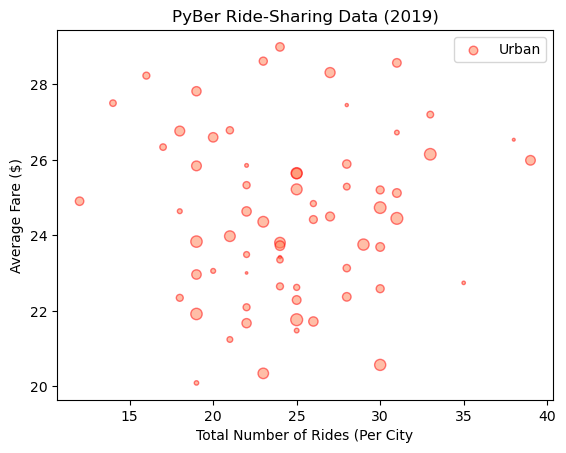

In [21]:
# Create the bubble chart for average fare and average ride for each city,
## y -axis = fare x-axis= rides


plt.scatter(urban_ride_count,urban_avg_fare,s=urban_avg_driver,
           color="coral",linewidths=1, label="Urban",alpha=.5, edgecolor="red")
# add labels
plt.title("PyBer Ride-Sharing Data (2019)")

plt.ylabel("Average Fare ($)")

plt.xlabel("Total Number of Rides (Per City")
# add legend
plt.legend()

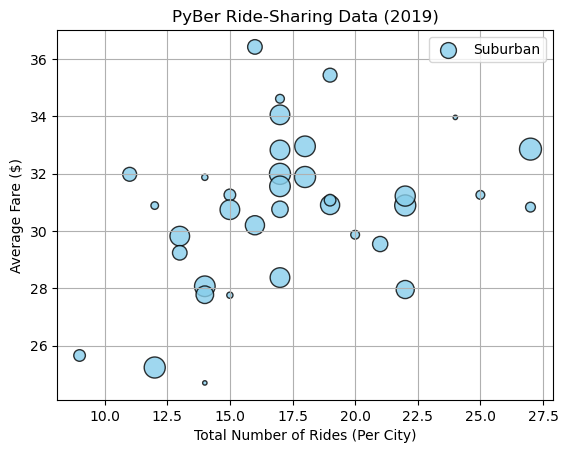

In [22]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_avg_driver, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

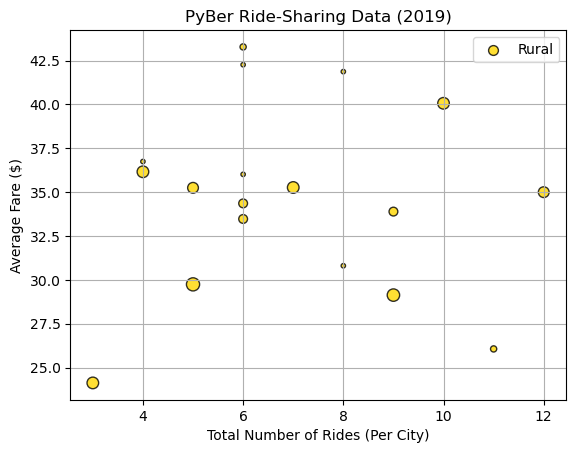

In [23]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_avg_driver, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

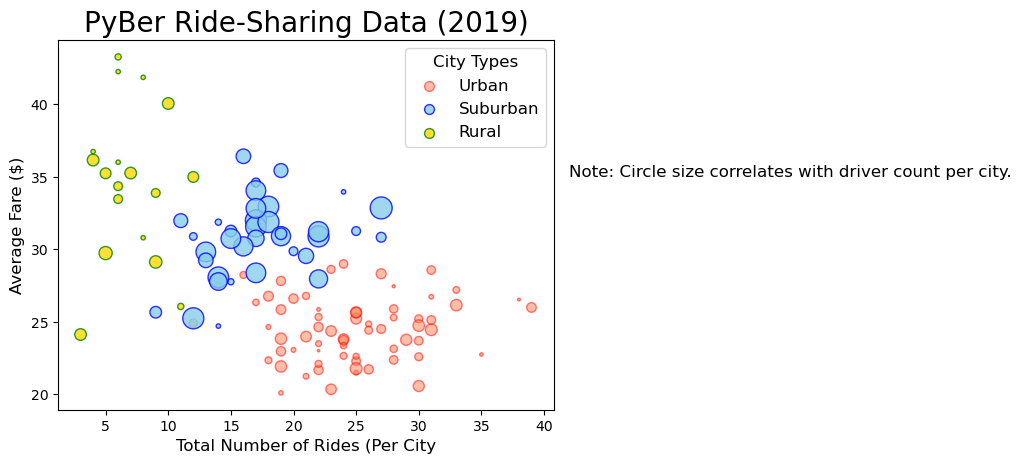

In [24]:
## combine all the scatter plots together

plt.scatter(urban_ride_count,urban_avg_fare,s=urban_avg_driver,
           color="coral",linewidths=1, label="Urban",alpha=.5, edgecolor="red")




plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_avg_driver, c="skyblue",
      edgecolor="blue", linewidths=1,
      alpha=0.8, label="Suburban")
            

            
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_avg_driver, c="gold",
      edgecolor="green", linewidths=1,
      alpha=0.8, label="Rural")
            
# add the labels and titels

plt.title("PyBer Ride-Sharing Data (2019)",fontsize=20)

plt.ylabel("Average Fare ($)",fontsize=12)

plt.xlabel("Total Number of Rides (Per City",fontsize=12)
# add legend

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")

lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
lgnd.get_title().set_fontsize(12)



# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#save the PNG

plt.savefig("./Fig1.png")

In [25]:
# Summart Statistics for nu,ner of rides by city type

# use .describe() for urbanC_df

urbanC_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [26]:
# get summary statistics for ride count

urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [27]:
# get mean, median and mode for each city: Urban, Suburban and Rural

round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [28]:
#calculate median

round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [29]:
#Calculate the mode

round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 Name: ride_id, dtype: int64,
 0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

In [30]:
# import the numpy and stats module from SciPy

import numpy as np
import scipy.stats as sts

In [31]:
# Calculate the measures of central tendency for the ride count for the urban cities.
## using np.mean()
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

The mean for the ride counts for urban trips is 24.62.


In [32]:
median_urban_ride_count = np.median(urban_ride_count)
##using np.median()
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

The median for the ride counts for urban trips is 24.0.


In [33]:
## calculate mode using sts.mode, add keepdims=True to get rid of warnings
mode_urban_ride_count = sts.mode(urban_ride_count,keepdims=True)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [34]:
##calculate mode using scipy stats for suburban using sts.mode() add keepdims=True to get rid of warnings

mode_suburban_ride_count=sts.mode(suburban_ride_count,keepdims=True)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [35]:
##calculate mode using scipy stats for rural using sts.mode() add keepdims=True to get rid of warnings

mode_rural_ride_count=sts.mode(rural_ride_count,keepdims=True)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [36]:
## summary statistics for Fare by city type (urbanC_df,suburbanC_df and ruralC_df)

urban_fares=urbanC_df["fare"]

urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [45]:
suburban_fares=suburbanC_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [46]:
rural_fares=ruralC_df["fare"]

rural_fares.head()


2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [37]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares,keepdims=True)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [38]:
## calculate Summary Statistics for the number of drivers by city type

urban_drivers=urbanC_df["driver_count"]

urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [56]:
suburban_drivers=suburbanC_df["driver_count"]

suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [58]:
rural_drivers=ruralC_df["driver_count"]

rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [39]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean drivers for urban trips is ${mean_urban_fares:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median drivers for urban trips is ${median_urban_fares:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers,keepdims=True)
print(f"The mode drivers for urban trips is {mode_urban_fares}.")

The mean drivers for urban trips is $24.53.
The median drivers for urban trips is $24.64.
The mode drivers for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


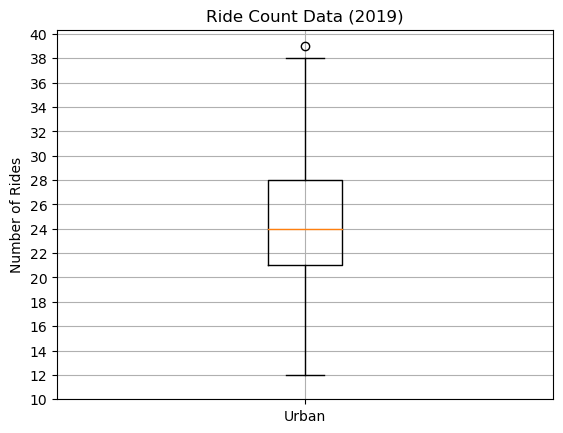

In [40]:
# creating Box-Whiskers Plot for ride count data

# need to use ax.boxplot() is required
x_labels=["Urban"]
fix, ax=plt.subplots()

ax.boxplot(urban_ride_count,labels=x_labels)

# add title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")

ax.set_ylabel("Number of Rides")

ax.set_yticks(np.arange(10, 41, step=2.0))

ax.grid()



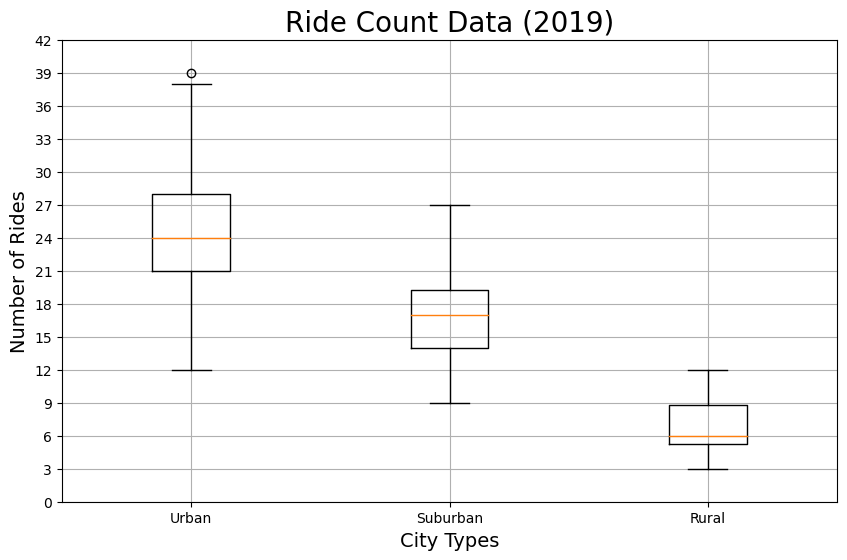

In [70]:
# Add all rides count to the box and whiskers plots to the same graph

# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]

ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10, 6))

# add labels and title
ax.set_title('Ride Count Data (2019)',fontsize=20)

ax.set_ylabel('Number of Rides',fontsize=14)

ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(0, 45, step=3.0))

ax.grid()

#save figure.

plt.savefig("./Fig2.png")

In [42]:
# get the city that matches 39

urban_city_outlier= urban_ride_count[urban_ride_count==39].index[0]

urban_city_outlier

'West Angela'

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

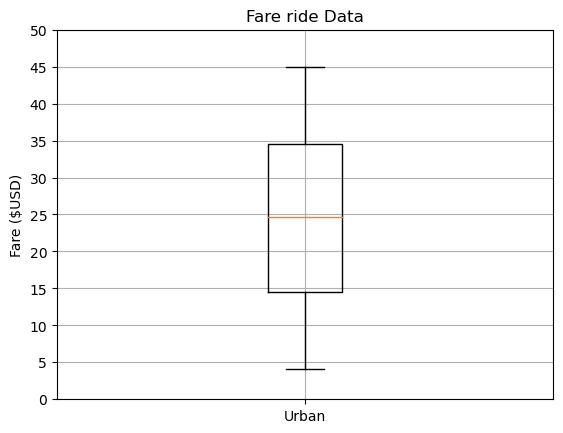

In [43]:
#create a box and whiskers plot for fare ride data

x_labels=["Urban"]



fig, ax = plt.subplots()

ax.boxplot(urban_fares, labels=x_labels)

#create title and labels 

ax.set_title("Fare ride Data")

ax.set_ylabel("Fare ($USD)")

ax.set_yticks(np.arange(0,55,step=5))

# add grid

ax.grid()

print("Summary Statistics")
urban_fares.describe()

Summary Statitics


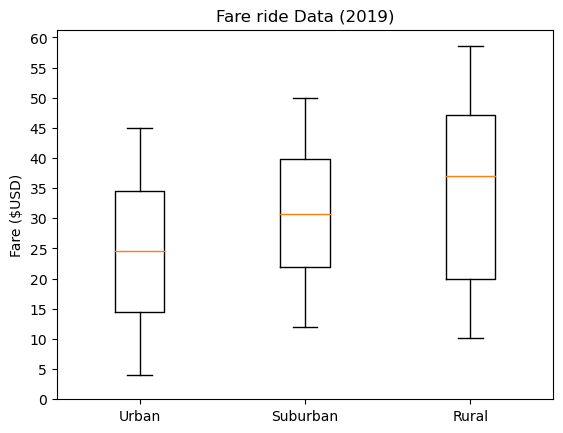

In [68]:
#create box and whiskers plot for all cities for fare

x_labels=["Urban","Suburban","Rural"]

fare_data=[urban_fares,suburban_fares,rural_fares]
fig, ax = plt.subplots()

ax.boxplot(fare_data, labels=x_labels)

#create title and labels 

ax.set_title("Fare ride Data (2019)")

ax.set_ylabel("Fare ($USD)")

ax.set_yticks(np.arange(0,65,step=5))

#save file

plt.savefig("./Fig3.png")

print("Summary Statitics")




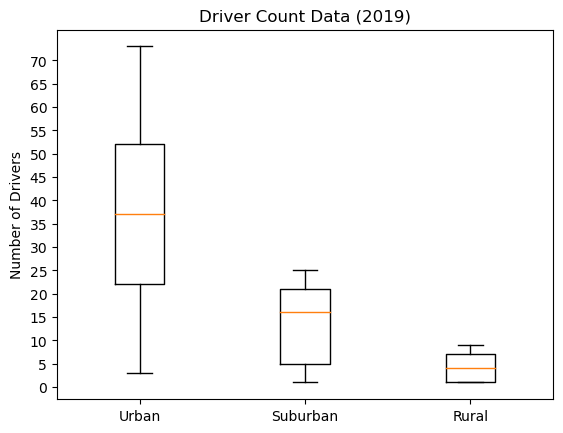

In [69]:
# make box and whikers plot for drivers in cities

x_labels=["Urban","Suburban","Rural"]
          
driver_data=[urban_drivers,suburban_drivers,rural_drivers]

fix, ax = plt.subplots()
          
ax.boxplot(driver_data, labels=x_labels)

#create labels and titles

ax.set_ylabel("Number of Drivers")

ax.set_title("Driver Count Data (2019)")

ax.set_yticks(np.arange(0,75, step=5))

#save file

plt.savefig("./Fig4.png")

In [79]:
# Get the Percentage of Fares for Each City Type

## 1.get total fares for each city type
## 2.get the total for all the fares for all the city types
## 3. Calculate the percentage of teh ttoal fares for each city type


# use the groupby fuction on pyber_data_df and group by "type"

sum_fares_by_type=pyber_df.groupby(["type"]).sum()["fare"]

sum_fares_by_type

#get total fares

total_fares=pyber_df["fare"].sum()

total_fares

#calculate th percentage of total fares for each city type

type_percents=100* sum_fares_by_type/total_fares

type_percents

#calculate the percentage of total fares using DataFrame

type_percents=100* pyber_df.groupby(["type"]).sum()["fare"]/pyber_df["fare"].sum()

type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

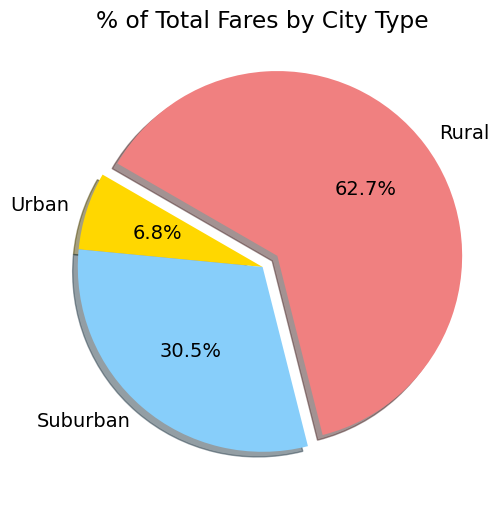

In [91]:
# build the percentage of fares by city type pit chart
import matplotlib as mpl

#build pie chart

plt.subplots(figsize=(10,6))

plt.pie(type_percents,colors=["gold","lightskyblue","lightcoral"],
        labels=["Urban","Suburban","Rural"],explode=[0,0,0.1],autopct="%1.1f%%",
         shadow=True,startangle=150)

# add title

plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.

mpl.rcParams['font.size'] = 14

# savefile

plt.savefig("./Fig5.png")